In [1]:
from autometrics.dataset.datasets import HelpSteer
from autometrics.util.analysis import display_top_5_metrics_by_validation, get_top_metric_by_validation, plot_metric_target_scatterplot
from autometrics.evaluate.correlation import calculate_correlation
from autometrics.aggregator.regression import Ridge
from autometrics.generator.LLMJudgeProposer import LLMJudgeProposer
from autometrics.metrics.MetricBank import all_metrics
import dspy
import pandas as pd
pd.set_option('display.max_colwidth', None)

import litellm

litellm.suppress_debug_info = True

/opt/miniconda3/envs/auto_eval/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import time

time.sleep(3600)

In [3]:
dataset = HelpSteer()

In [4]:
train, dev, test = dataset.get_splits(train_ratio=0.2, val_ratio=0.3, seed=42, max_size=1000)

In [5]:
llama31_70b = dspy.LM("openai/meta-llama/Meta-Llama-3-70b-Instruct", api_base="http://future-hgx-1:7410/v1", api_key="None")

dspy.settings.configure(lm=llama31_70b)

In [6]:
llama31_70b.model

'openai/meta-llama/Meta-Llama-3-70b-Instruct'

In [7]:
from autometrics.metrics.llm_judge.LLMJudgeExampleRubric import LLMJudgeExampleRubric

In [8]:
for target_column in dataset.target_columns:
    new_metric = LLMJudgeExampleRubric(
        name=target_column + "_" + llama31_70b.model.split('/')[-1], 
        description="Optimized Example Rubric LLM as a judge for " + target_column, 
        model=llama31_70b,
        train_dataset=train,
        task_description="Answer the user query as a helpful chatbot assistant.",
        target_column=target_column,
        output_prompt_path='helpsteer_exrubriclong_' + target_column + '_prompt.dspy',
        metric_name=target_column,
        examples_per_range=10,
    )

    train.add_metrics([new_metric])
    dev.add_metrics([new_metric])
    test.add_metrics([new_metric])

Average Metric: 608.5333333333332 / 1000  (60.9): 100%|██████████| 1000/1000 [00:15<00:00, 63.63it/s]


New best score: 60.85


Average Metric: 629.9833333333335 / 1000  (63.0): 100%|██████████| 1000/1000 [06:48<00:00,  2.45it/s]


New best score: 63.0


Average Metric: 634.1833333333337 / 1000  (63.4): 100%|██████████| 1000/1000 [07:31<00:00,  2.21it/s]


New best score: 63.42


Average Metric: 635.3000000000003 / 1000  (63.5): 100%|██████████| 1000/1000 [15:11<00:00,  1.10it/s]


New best score: 63.53


Average Metric: 719.5500000000005 / 1000  (72.0): 100%|██████████| 1000/1000 [30:40<00:00,  1.84s/it]


New best score: 71.96


Average Metric: 723.9666666666675 / 1000  (72.4): 100%|██████████| 1000/1000 [1:15:10<00:00,  4.51s/it]


New best score: 72.4


Grading rows: 100%|██████████| 1789/1789 [11:50<00:00,  2.52row/s] 
Average Metric: 375.46071428571247 / 1000  (37.5): 100%|██████████| 1000/1000 [07:45<00:00,  2.15it/s]


New best score: 37.55


Average Metric: 487.7178571428543 / 1000  (48.8): 100%|██████████| 1000/1000 [07:16<00:00,  2.29it/s]


New best score: 48.77


Grading rows: 100%|██████████| 1789/1789 [10:33<00:00,  2.82row/s] 
Average Metric: 429.42619047618814 / 1000  (42.9): 100%|██████████| 1000/1000 [07:55<00:00,  2.10it/s]


New best score: 42.94


Average Metric: 415.89285714285467 / 1000  (41.6): 100%|██████████| 1000/1000 [14:38<00:00,  1.14it/s]
Average Metric: 453.26904761904507 / 1000  (45.3): 100%|██████████| 1000/1000 [43:12<00:00,  2.59s/it] 


New best score: 45.33


Average Metric: 401.1666666666644 / 1000  (40.1): 100%|██████████| 1000/1000 [08:15<00:00,  2.02it/s]
Average Metric: 409.90238095237873 / 1000  (41.0): 100%|██████████| 1000/1000 [08:05<00:00,  2.06it/s]
Grading rows: 100%|██████████| 1789/1789 [12:52<00:00,  2.32row/s] 


In [9]:
display_top_5_metrics_by_validation(dev, test, True)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
helpfulness,correctness_llama70b (0.32785126335593673),helpfulness_llama70b (0.3714874001459126),coherence_llama70b (0.33406097260669065),verbosity_llama70b (0.16951189344044035),complexity_llama70b (0.08169319848689409)
correctness,helpfulness_llama70b (0.3779178863020401),correctness_llama70b (0.3355514003012165),coherence_llama70b (0.3340206618849781),verbosity_llama70b (0.1413018367751021),complexity_llama70b (0.06463983118066063)
coherence,helpfulness_llama70b (0.25548376178126403),correctness_llama70b (0.19960362217473934),coherence_llama70b (0.24829137740896376),verbosity_llama70b (0.09498654154031048),complexity_llama70b (0.046434202629681655)
complexity,verbosity_llama70b (0.2210746059700512),complexity_llama70b (0.24402564466604867),coherence_llama70b (0.14842164049772932),helpfulness_llama70b (0.1576324246456978),correctness_llama70b (0.1710784658678231)
verbosity,verbosity_llama70b (0.2937924664281496),complexity_llama70b (0.31258319339844204),correctness_llama70b (0.1857327866493863),coherence_llama70b (0.1287826535344042),helpfulness_llama70b (0.12335114875478516)


In [10]:
from tqdm import tqdm
for target in tqdm(dataset.get_target_columns()):
    aggregator = Ridge(dataset=train, name=f'Ridge_{target}_llm')
    aggregator.ensure_dependencies(train)
    aggregator.ensure_dependencies(dev)
    aggregator.ensure_dependencies(test)

100%|██████████| 5/5 [00:01<00:00,  3.01it/s]


In [11]:
train.get_metric_columns()

['helpfulness_Meta-Llama-3-70b-Instruct',
 'correctness_Meta-Llama-3-70b-Instruct',
 'coherence_Meta-Llama-3-70b-Instruct',
 'complexity_Meta-Llama-3-70b-Instruct',
 'verbosity_Meta-Llama-3-70b-Instruct']

In [12]:
for target in tqdm(dataset.get_target_columns()):
    aggregator = Ridge(dataset=train, name=f'Ridge_{target}_llm')
    aggregator.learn(train, target)
    aggregator.predict(train)
    aggregator.predict(dev)
    aggregator.predict(test)

100%|██████████| 5/5 [00:02<00:00,  2.37it/s]


In [13]:
display_top_5_metrics_by_validation(dev, test, True)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
helpfulness,correctness_llama70b (0.32785126335593673),helpfulness_llama70b (0.3714874001459126),coherence_llama70b (0.33406097260669065),Rg_correctness_llm (0.295116038550153),Rg_helpfulness_llm (0.29141179284962576)
correctness,helpfulness_llama70b (0.3779178863020401),correctness_llama70b (0.3355514003012165),coherence_llama70b (0.3340206618849781),Rg_correctness_llm (0.30337556367338364),Rg_helpfulness_llm (0.29498466789639377)
coherence,helpfulness_llama70b (0.25548376178126403),correctness_llama70b (0.19960362217473934),coherence_llama70b (0.24829137740896376),Rg_correctness_llm (0.17918306073491438),Rg_coherence_llm (0.18098799506730806)
complexity,Rg_complexity_llm (0.2562519187425589),Rg_verbosity_llm (0.2518136701698396),verbosity_llama70b (0.2210746059700512),complexity_llama70b (0.24402564466604867),coherence_llama70b (0.14842164049772932)
verbosity,Rg_verbosity_llm (0.3235772717202512),Rg_complexity_llm (0.3195137869510352),verbosity_llama70b (0.2937924664281496),complexity_llama70b (0.31258319339844204),correctness_llama70b (0.1857327866493863)


In [14]:
display_top_5_metrics_by_validation(test, test, True)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
helpfulness,helpfulness_llama70b (0.3714874001459126),coherence_llama70b (0.33406097260669065),correctness_llama70b (0.32785126335593673),Rg_correctness_llm (0.295116038550153),Rg_helpfulness_llm (0.29141179284962576)
correctness,helpfulness_llama70b (0.3779178863020401),correctness_llama70b (0.3355514003012165),coherence_llama70b (0.3340206618849781),Rg_correctness_llm (0.30337556367338364),Rg_helpfulness_llm (0.29498466789639377)
coherence,helpfulness_llama70b (0.25548376178126403),coherence_llama70b (0.24829137740896376),correctness_llama70b (0.19960362217473934),Rg_coherence_llm (0.18098799506730806),Rg_correctness_llm (0.17918306073491438)
complexity,Rg_complexity_llm (0.2562519187425589),Rg_verbosity_llm (0.2518136701698396),complexity_llama70b (0.24402564466604867),verbosity_llama70b (0.2210746059700512),correctness_llama70b (0.1710784658678231)
verbosity,Rg_verbosity_llm (0.3235772717202512),Rg_complexity_llm (0.3195137869510352),complexity_llama70b (0.31258319339844204),verbosity_llama70b (0.2937924664281496),correctness_llama70b (0.1857327866493863)


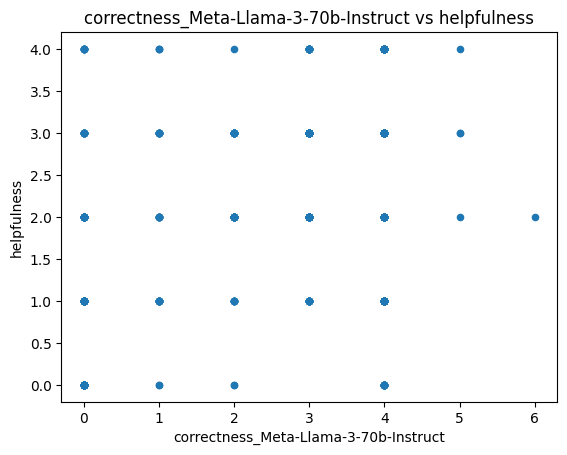

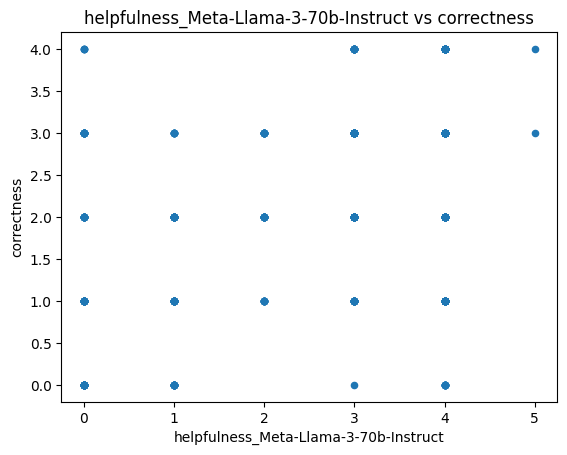

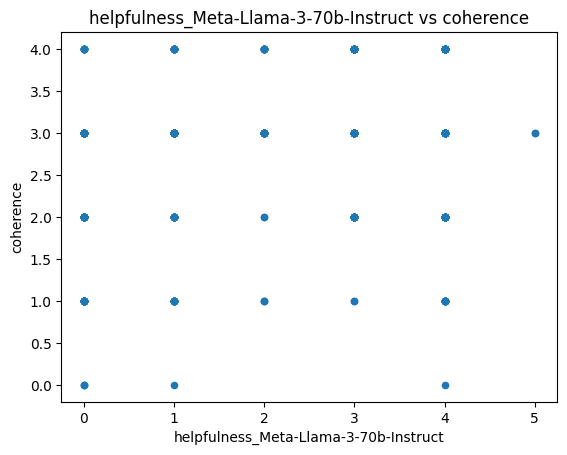

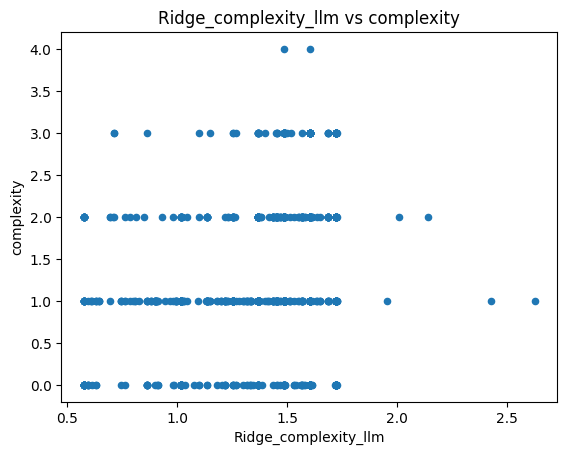

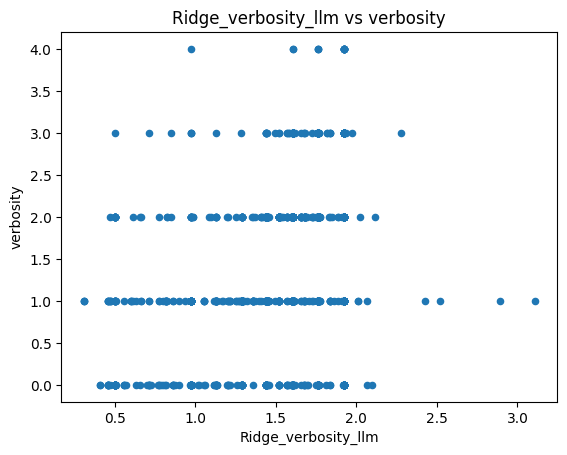

In [15]:
for target_column in dataset.target_columns:
    metric = get_top_metric_by_validation(dev, target_column, True)
    plot_metric_target_scatterplot(test, metric, target_column)
